# Data Science Project
This notebook is destinated to analysis in academic purposes only.

## Libraries

In [3]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
print('Standard libraries for data analysis: Loaded.')


# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print('Sklearn modules for data preprocessing: Loaded.')

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
print('Standard libraries for data visualization: Loaded.')

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
print('Miscellaneous Utilitiy Libraries: Loaded.')

Standard libraries for data analysis: Loaded.
Sklearn modules for data preprocessing: Loaded.
Standard libraries for data visualization: Loaded.
Miscellaneous Utilitiy Libraries: Loaded.


## Step 1 - Data Pre-processing

### 1.1 - Importing Csv file

In [207]:
dataset = pd.read_csv('bank-additional-full.csv',delimiter=';')

### 1.2 - Looking the structure

In [13]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['age', 'duration', 'campaign', 'pdays', 'previous'], float64: ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']}

In [15]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


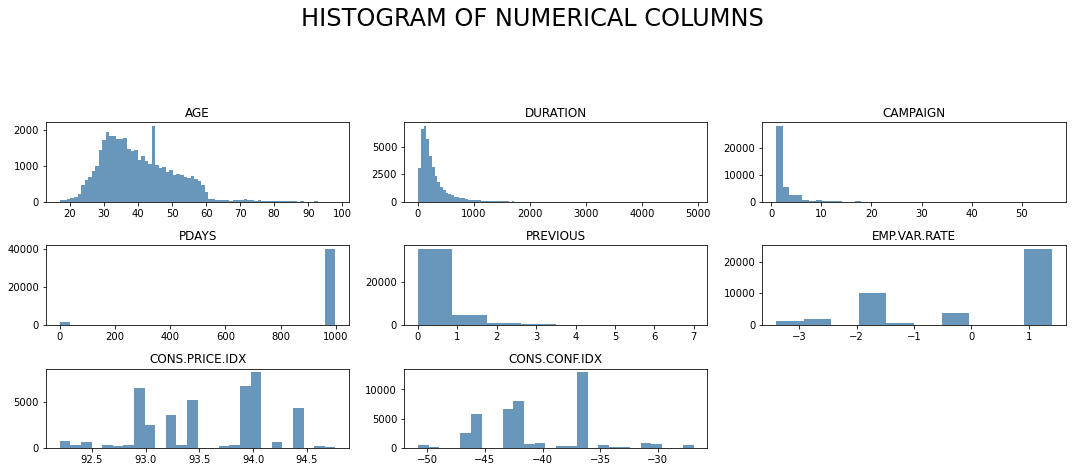

In [134]:
dataset2 = dataset[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx']]

#HISTOGRAM
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('HISTOGRAM OF NUMERICAL COLUMNS \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i].upper())
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#6897bb')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


### Observations:

- Age of clients is in average 40s with 10 years of difference from each other.
- Last contact duration was in average 258 min (4h and 30min).
- Clients were contacted in average 2 times.
- The number of days that passed by after the client was last contacted from a previous campaign was in average 962 days.
- The consumer price per client in average is 93.57 per month.
- The confidence consumer rate per client is 40.50 (negative) per month.
- The rate of interest about banks services (loan, etc.) is in average 3 clients in last three months (1 per month).

### 1.3 - Wrangling data

In [17]:
dataset.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [20]:
dataset.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [208]:
#Cleaning trash symbols
#----------------------------

dataset['education'] = dataset['education'].str.replace('.',' ')

### Observations:
There are not any null values  or missing values in this dataset. It is clean to analysis.

### 1.4 - Checking Categorical Values - Client Data

In [35]:
#Bank CLient Data
#----------------------------

job = dataset['job'].nunique() 
job = dataset['job'].unique()
education = dataset['education'].nunique()
education = dataset['education'].unique()

print('------------------------------')
print('Clients job: ')
print(job)

print('------------------------------')
print('Client education: ')
print(education)

------------------------------
Clients job: 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------
Client education: 
['basic 4y' 'high school' 'basic 6y' 'basic 9y' 'professional course'
 'unknown' 'university degree' 'illiterate']


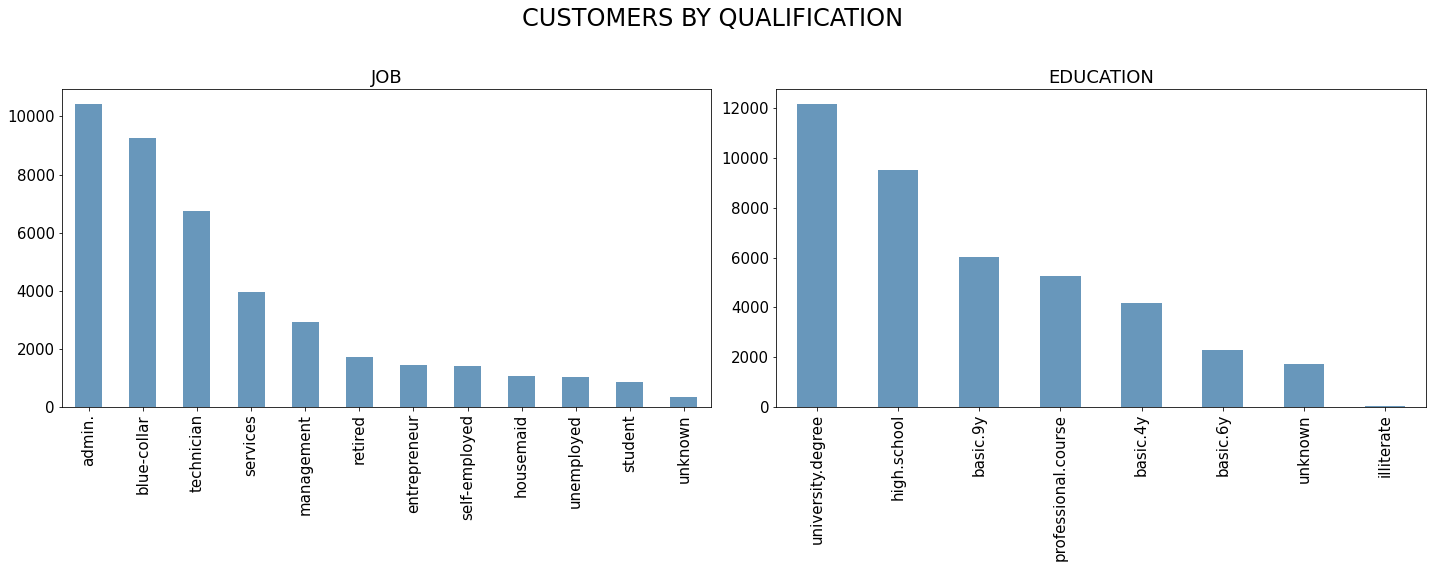

In [135]:
client_data = dataset[['job', 'education']]

fig, axes = plt.subplots(1,2, figsize=(20,8))
plt.suptitle('CUSTOMERS BY QUALIFICATION \n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i, item in enumerate(client_data):
    ax = client_data[item].value_counts().plot(kind = 'bar',ax=axes[i], rot = 90, fontsize = 15, color ='#6897bb')
    ax.set_title(client_data.columns.values[i].upper(), fontdict={'fontsize': 18, 'fontweight': 500})
    
fig.tight_layout() 

In [101]:
print('default: has credit in default?')
print(dataset['default'].value_counts()/dataset['default'].size*100)
print('--------------------------------------------')

print('housing: has housing loan?')
print(dataset['housing'].value_counts()/dataset['housing'].size*100)
print('--------------------------------------------')

print('loan: has personal loan?')
print(dataset['loan'].value_counts()/dataset['loan'].size*100)

default: has credit in default?
no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64
--------------------------------------------
housing: has housing loan?
yes        52.384190
no         45.212198
unknown     2.403613
Name: housing, dtype: float64
--------------------------------------------
loan: has personal loan?
no         82.426920
yes        15.169467
unknown     2.403613
Name: loan, dtype: float64


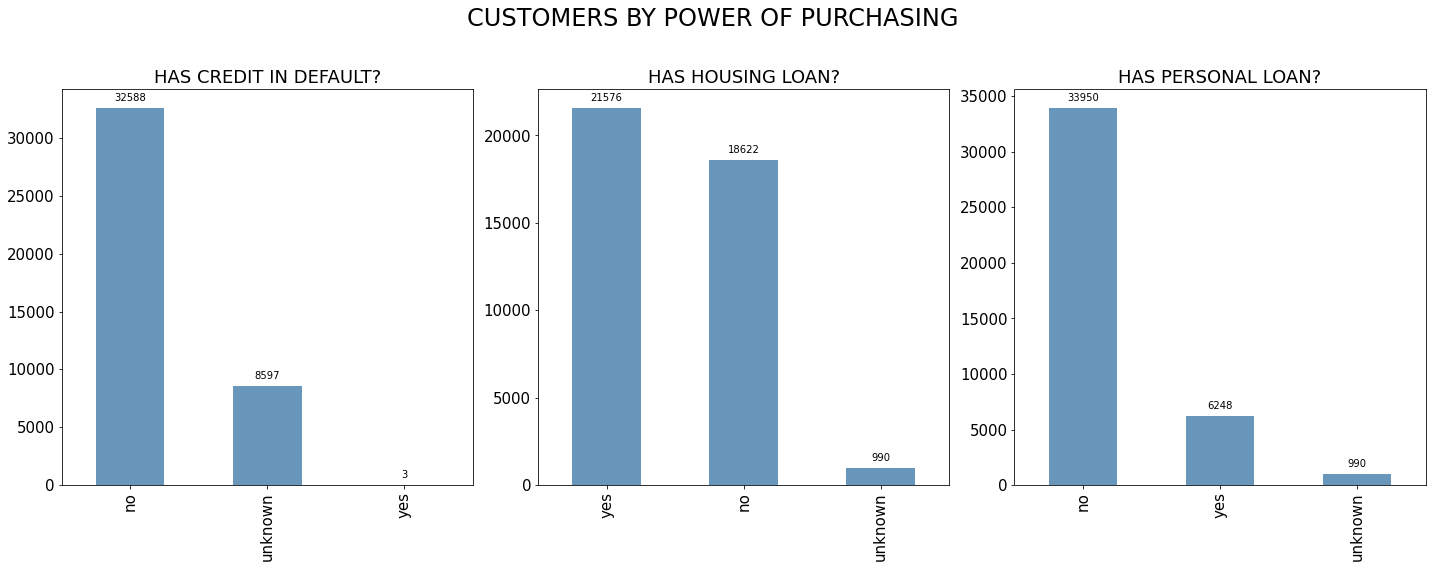

In [136]:
client_data2 = dataset[['default', 'housing', 'loan']]
client_data2 = client_data2.rename(columns={'default':'has credit in default?', 'housing':'has housing loan?', 'loan':'has personal loan?'})


fig, axes = plt.subplots(1,3, figsize=(20,8))
plt.suptitle('CUSTOMERS BY POWER OF PURCHASING \n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")


def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label,(x_value, y_value),xytext=(0, space),textcoords="offset points", ha='center',va=va)  


for i, item in enumerate(client_data2):
    ax = client_data2[item].value_counts().plot(kind = 'bar',ax=axes[i], rot = 90, fontsize = 15, color ='#6897bb')
    ax.set_title(client_data2.columns.values[i].upper(), fontdict={'fontsize': 18, 'fontweight': 500})
    add_value_labels(ax)
    
    
fig.tight_layout() 

### Observations:

- Most clients have a job in these fields: Administration, Industry Worker, Technician.
- The majority of clients has a university degree, or a high school certificate or at least a basic 9y.
- Almost 20% of clients has some credit in default, 45% has not a house in loan and 15% of 85% has not a personal loan acquired.

### 1.5 - Checking Categorical Values - Last Contact of the current campaign

In [206]:
#contact, month, day_of_week
#-------------------------------

campaign = dataset[['contact','month','day_of_week']]
print('Way of contact: ')
print('------------------------------')
print(round(campaign['contact'].value_counts()/np.product(campaign['contact'].size)*100),2)
print('\n')
print('Month of contact: ')
print('------------------------------')
print(round(campaign['month'].value_counts()/np.product(campaign['month'].size)*100),2)
print('\n')
print('Day of Week of contact: ')
print('------------------------------')
print(round(campaign['day_of_week'].value_counts()/np.product(campaign['day_of_week'].size)*100),2)

Way of contact: 
------------------------------
0    63.0
1    37.0
Name: contact, dtype: float64 2


Month of contact: 
------------------------------
may    33.0
jul    17.0
aug    15.0
jun    13.0
nov    10.0
apr     6.0
oct     2.0
sep     1.0
mar     1.0
dec     0.0
Name: month, dtype: float64 2


Day of Week of contact: 
------------------------------
thu    21.0
mon    21.0
wed    20.0
tue    20.0
fri    19.0
Name: day_of_week, dtype: float64 2


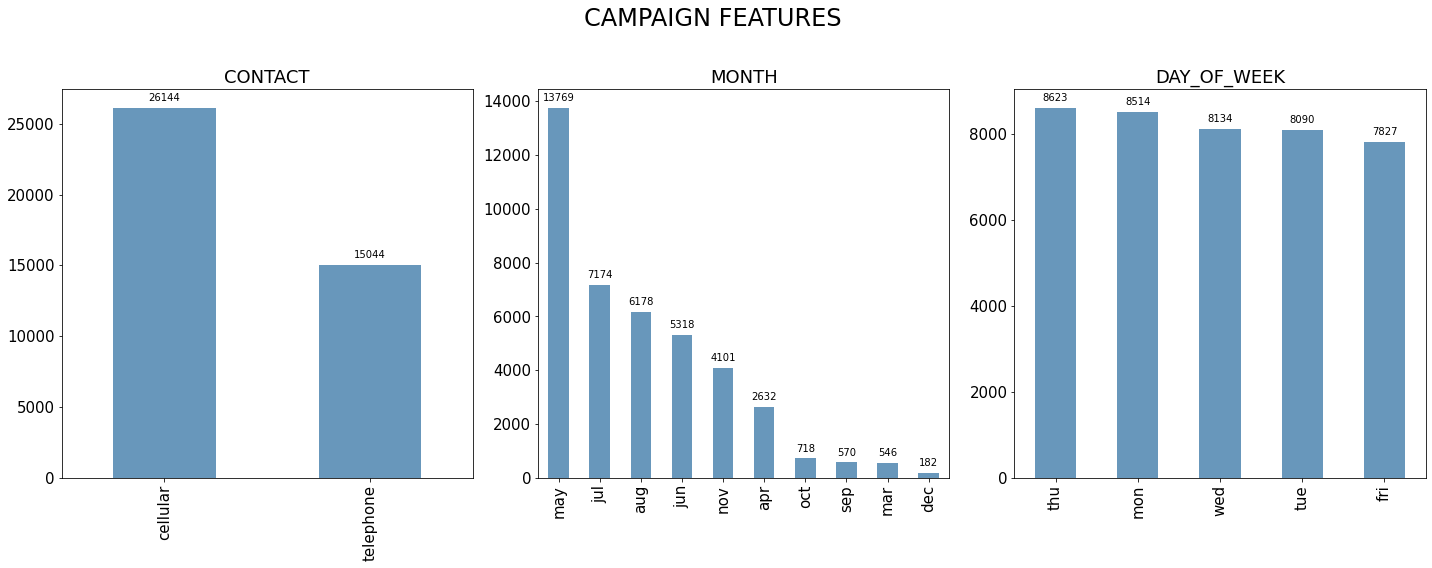

In [192]:
fig, axes = plt.subplots(1,3, figsize=(20,8))
plt.suptitle('CAMPAIGN FEATURES \n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")


def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label,(x_value, y_value),xytext=(0, space),textcoords="offset points", ha='center',va=va)  


for i, item in enumerate(campaign):
    ax = campaign[item].value_counts().plot(kind = 'bar',ax=axes[i], rot = 90, fontsize = 15, color ='#6897bb')
    ax.set_title(campaign.columns.values[i].upper(), fontdict={'fontsize': 18, 'fontweight': 500})
    add_value_labels(ax)
    
    
fig.tight_layout() 

In [195]:
#outcome
#--------------------

print('Outcome achieved with the last campaign: ')
print('------------------------------')
print(round(dataset['poutcome'].value_counts()/np.product(dataset['poutcome'].size)*100))
print('\n')

Outcome achieved with the last campaign: 
------------------------------
nonexistent    86.0
failure        10.0
success         3.0
Name: poutcome, dtype: float64




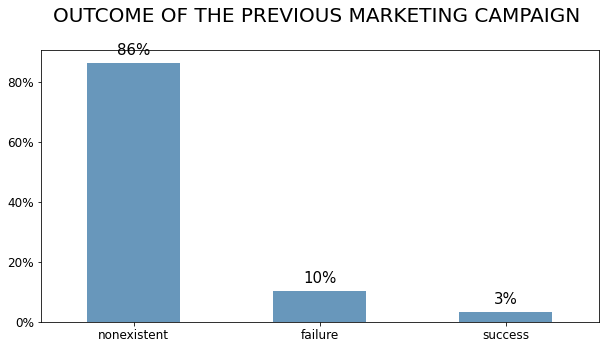

In [198]:
plt.figure(figsize=(10,5))

percent = dataset['poutcome'].value_counts()/np.product(dataset['poutcome'].size)*100

ax = percent.plot(kind = 'bar', rot = 0, fontsize = 12, color ='#6897bb')

plt.title('OUTCOME OF THE PREVIOUS MARKETING CAMPAIGN \n', horizontalalignment="center", fontstyle="normal", fontsize=20, fontfamily="sans-serif")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'bottom'       
        label = "{:.0f}%".format(y_value)      
        ax.annotate(label,(x_value, y_value),xytext=(0, space),fontsize=15, textcoords="offset points", ha='center',va=va)
        
add_value_labels(ax)      

### Observations:
- More than 63% of clients used cellphone as a way of contact.
- The month with the highest number of contact was May.
- The days with more contact was Monday and Thurdays, both with more than 20%.
- The highest outcome is nonexistent with 86% of all clients.

### 1.6 - Checking Categorical Values - Target: y

In [139]:
dataset['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

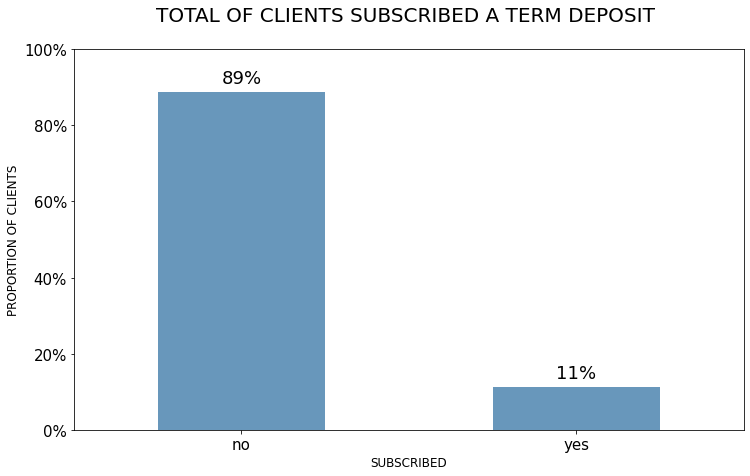

In [167]:
import matplotlib.ticker as mtick

percent = dataset['y'].value_counts()/np.product(dataset['y'].size)*100

ax =  percent.plot.bar(title = 'TOTAL OF CLIENTS SUBSCRIBED A TERM DEPOSIT \n', legend=False, table = False, grid = False,  subplots = False, figsize =(12, 7), color = '#6897bb', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('PROPORTION OF CLIENTS',horizontalalignment="center",fontstyle = "normal", fontsize = 12, fontfamily = "sans-serif")
plt.xlabel('SUBSCRIBED',horizontalalignment="center",fontstyle = "normal", fontsize = 12, fontfamily = "sans-serif")

plt.title('TOTAL OF CLIENTS SUBSCRIBED A TERM DEPOSIT \n',horizontalalignment="center", fontstyle = "normal", fontsize = "20", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'bottom'       
        label = "{:.0f}%".format(y_value)      
        ax.annotate(label,(x_value, y_value),xytext=(0, space),fontsize=18, textcoords="offset points", ha='center',va=va)
        
add_value_labels(ax)  

ax.autoscale(enable=False, axis='both', tight=False)

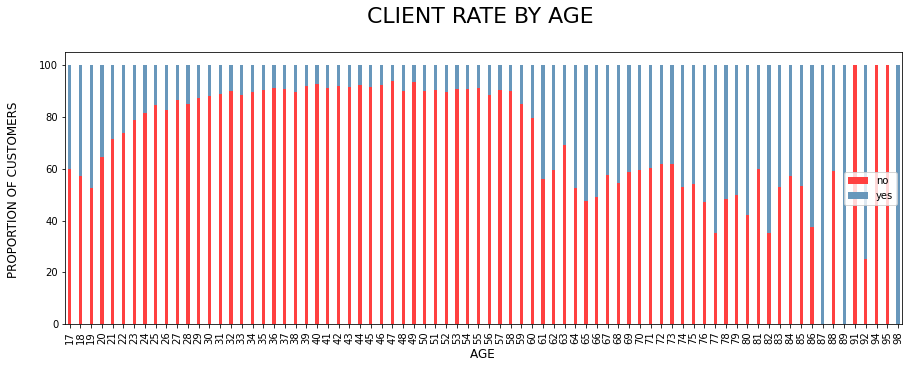

In [267]:
# Target vs. Job and Education

import matplotlib.ticker as mtick

job_target = dataset.groupby(['age','y']).size().unstack().T
job_target.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ff4040','#6897bb']

ax = (job_target*100.0 / job_target.sum()).T.plot(kind='bar',width = 0.3, stacked = True, rot = 0, figsize = (15,5), color = colors)

plt.ylabel('PROPORTION OF CUSTOMERS \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('AGE \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('CLIENT RATE BY AGE \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='center right', fontsize = "medium")

plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
  
ax.autoscale(enable=False, axis='both', tight=False)

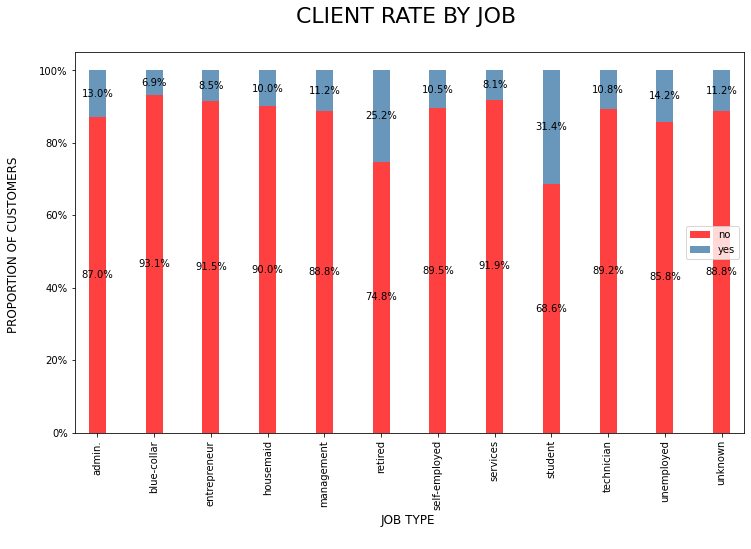

In [182]:
# Target vs. Job and Education

import matplotlib.ticker as mtick

job_target = dataset.groupby(['job','y']).size().unstack().T
job_target.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ff4040','#6897bb']

ax = (job_target*100.0 / job_target.sum()).T.plot(kind='bar',width = 0.3, stacked = True, rot = 0, figsize = (12,7), color = colors)

plt.ylabel('PROPORTION OF CUSTOMERS \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('JOB TYPE \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('CLIENT RATE BY JOB \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='center right', fontsize = "medium")

plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

    
ax.autoscale(enable=False, axis='both', tight=False)

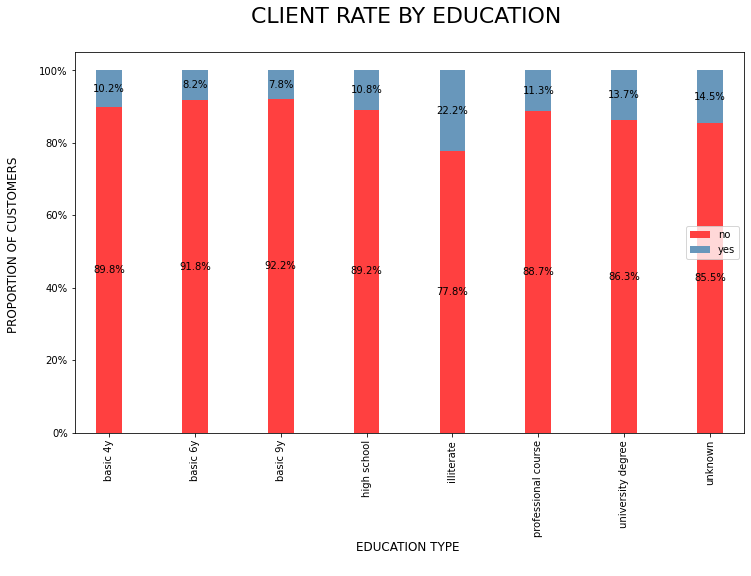

In [260]:
# Target vs. Job and Education

import matplotlib.ticker as mtick

job_target = dataset.groupby(['education','y']).size().unstack().T
job_target.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ff4040','#6897bb']

ax = (job_target*100.0 / job_target.sum()).T.plot(kind='bar',width = 0.3, stacked = True, rot = 0, figsize = (12,7), color = colors)

plt.ylabel('PROPORTION OF CUSTOMERS \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('EDUCATION TYPE \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('CLIENT RATE BY EDUCATION \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='center right', fontsize = "medium")

plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

    
ax.autoscale(enable=False, axis='both', tight=False)

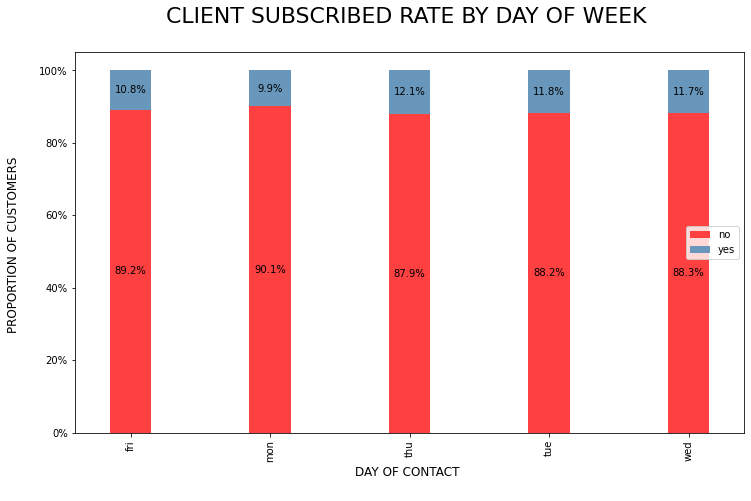

In [184]:
# Target vs Day of week

day_target = dataset.groupby(['day_of_week','y']).size().unstack().T
day_target.rename(columns={0:'No',1:'Yes'}, inplace=True)

colors  = ['#ff4040','#6897bb']

ax = (day_target*100 / day_target.sum()).T.plot(kind='bar',width = 0.3, stacked = True, rot = 0, figsize = (12,7), color = colors)

plt.ylabel('PROPORTION OF CUSTOMERS \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('DAY OF CONTACT \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('CLIENT SUBSCRIBED RATE BY DAY OF WEEK \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='center right', fontsize = "medium")

plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

    
ax.autoscale(enable=False, axis='both', tight=False)

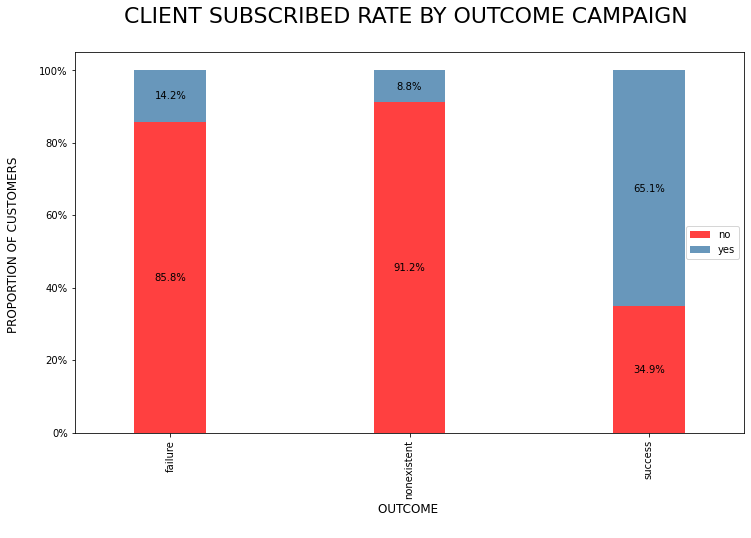

In [187]:
# Target vs. Poutcome

poutcome_target = dataset.groupby(['poutcome','y']).size().unstack().T

colors  = ['#ff4040','#6897bb']

ax = (poutcome_target*100 / poutcome_target.sum()).T.plot(kind='bar',width = 0.3, stacked = True, rot = 0, figsize = (12,7), color = colors)

plt.ylabel('PROPORTION OF CUSTOMERS \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('OUTCOME \n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('CLIENT SUBSCRIBED RATE BY OUTCOME CAMPAIGN \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='center right', fontsize = "medium")

plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

    
ax.autoscale(enable=False, axis='both', tight=False)


### Observations:
- 'TOTAL OF CLIENTS SUBSCRIBED A TERM DEPOSIT': 89% of all clients did not make any subscription in the bank.
- 'CLIENT RATE BY JOB': the majority of clients who subscribed some deposit are in the group of retired and students. The majority of client who do not made any deposit are in the group of industry workers and entrepreneur.
- 'CLIENT RATE BY EDUCATION': The highest number of client that subscribed a deposit is illiterant and who showed more resistence was basic 9y level of education.
- 'CLIENT SUBSCRIBED RATE BY DAY OF WEEK': The best day of the last campaign was Thursday with 12% of clients subscribed a deposit. THe worst day was Monday with 90% of clients did not subscribed.
- 'CLIENT SUBSCRIBED RATE BY OUTCOME CAMPAIGN': More than 65% of clients classified as 'success' subscribed a deposit and almost 34% did not. Interestly, 14% of the clients classified as 'failure' subscribed a deposit and almost 9% of 'nonexistent' subscribed also.

### 1.7 - Correlations, Collinearity and Multicollinearity - target vs. data

#### Positive and Negative correlations - 

In [212]:
#Create a label encoder object to [y]
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
dataset['target'] = le.fit(dataset['y'])
dataset['target'] = le.transform(dataset['y'])

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: target, Length: 41188, dtype: int64

In [223]:
correl_data = dataset[['age', 'duration', 'campaign','previous', 'cons.price.idx','cons.conf.idx','nr.employed']]

correlations = correl_data.corrwith(dataset.target)

correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations*100)
print('\nMost Negative Correlations: \n', negative_correlations*100)

#Apparently it is more about the time and the previous contact of bank before the campaign.

Most Positive Correlations: 
 duration         40.527380
previous         23.018100
cons.conf.idx     5.487795
age               3.039880
dtype: float64

Most Negative Correlations: 
 campaign          -6.635741
cons.price.idx   -13.621121
nr.employed      -35.467830
dtype: float64


Text(0.5, 1.0, 'CORRELATION WITH SUBSCRIBED DEPOSIT RATE \n')

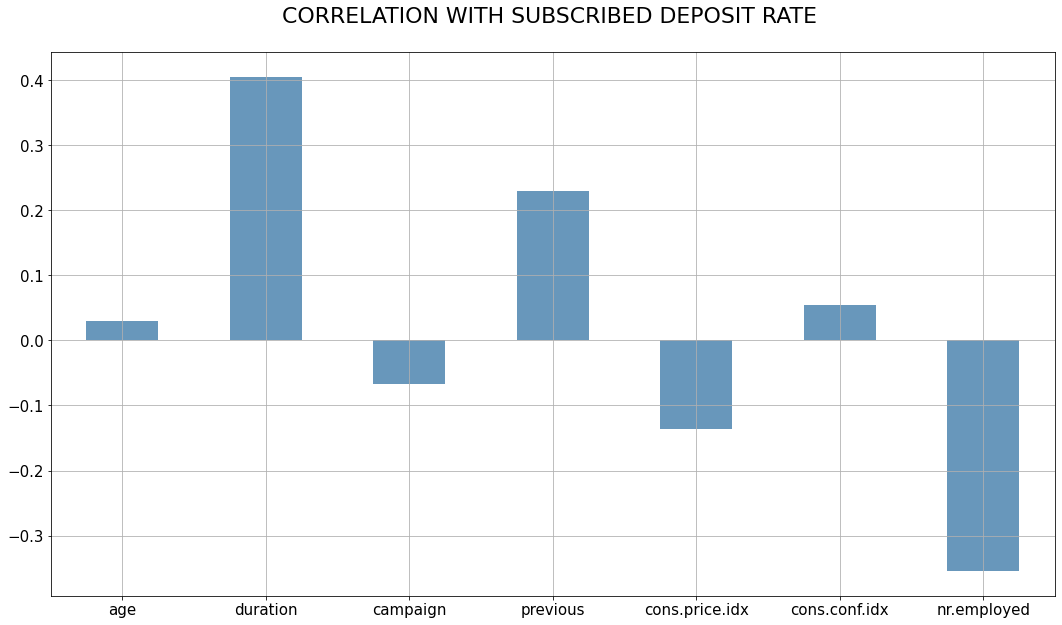

In [224]:
correlations.plot.bar(figsize = (18, 10), fontsize = 15, color = '#6897bb',rot = 0, grid = True)

plt.title('CORRELATION WITH SUBSCRIBED DEPOSIT RATE \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


data = dataset[['age','duration','campaign','previous','cons.price.idx','cons.conf.idx']]
calc_vif(data)

,variables,VIF
0,age,16.019793
1,duration,2.003627
2,campaign,1.883231
3,previous,1.134406
4,cons.price.idx,103.449458
5,cons.conf.idx,78.473738


Text(0.5, 1.0, 'Collinearity of Consumer Price and Consumer Confidence \n')

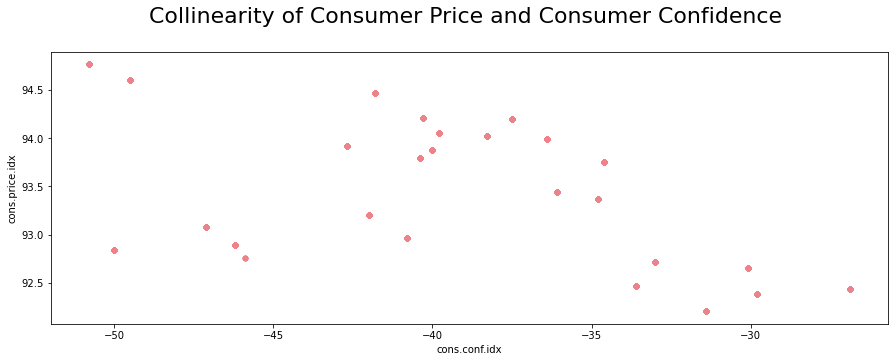

In [247]:
#Check colinearity:
    
dataset[['cons.price.idx', 'cons.conf.idx']].plot.scatter(figsize = (15, 5), x ='cons.conf.idx',y='cons.price.idx', color =  '#ec838a')

plt.title('Collinearity of Consumer Price and Consumer Confidence \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")


In [259]:
#Checking relationship

data2 = dataset[['age','cons.price.idx','cons.conf.idx']]
calc_vif(data2)


,variables,VIF
0,age,15.996892
1,cons.price.idx,101.649021
2,cons.conf.idx,78.112723


In [258]:
data3 = dataset[['cons.price.idx','cons.conf.idx']]
calc_vif(data3)

,variables,VIF
0,cons.price.idx,76.870411
1,cons.conf.idx,76.870411


### Observations:
- There are a positive correlation between duration (last contact duration, in seconds (numeric)) and previous (number of contacts performed before this campaign and for this client (numeric)). However there are a strong multicollinearity between age, consumer price index and consumer confidence index group.

### Recent Considerations:
These are the lastest considerations about Exploratory Analysis on UCI-Bank-Marketing-Dataset:

- Age of clients is in average 40s with 10 years of difference from each other.
- The clients between 30s and 60s are who most resisted to make a subscription last campaign.
- The consumer price per client in average is 93.57 per month.
- The confidence consumer rate per client is 40.50 (negative) per month.

- There are not any null values or missing values in this dataset. It is clean to analysis.

- Most clients have a job in these fields: Administration, Industry Worker, Technician.
- The majority of clients has a university degree, or a high school certificate or at least a basic 9y.
- Almost 20% of clients has some credit in default, 45% has not a house in loan and 15% of 85% has not a personal loan acquired.

- More than 63% of clients used cellphone as a way of contact.
- The month with the highest number of contact was May.
- The days with more contact was Monday and Thurdays, both with more than 20%. Even though, the best day of the last campaign was Thursday with 12% of clients subscribed a deposit, the worst day was Monday with 90% of clients did not subscribed.
- The highest outcome is nonexistent with 86% of all clients.

- 89% of all clients did not make any subscription in the bank.
- the majority of clients who subscribed some deposit are in the group of retired and students.
- The group of industry workers and entrepreneur are who most resisted a subscription last campaign.
- The highest number of client that subscribed a deposit is illiterant and who showed more resistence was basic 9y level of education.
- More than 65% of clients classified as 'success' subscribed a deposit and almost 34% did not. Interestly, 14% of the clients classified as 'failure' subscribed a deposit and almost 9% of 'nonexistent' subscribed also.

and lastly, there are a positive correlation between duration (last contact duration, in seconds (numeric)) and previous (number of contacts performed before this campaign and for this client (numeric)). 
After two consecutively tests, was proofed there are a strong multicollinearity between age, consumer price index and consumer confidence index group variables.
